# Figure 6: showcasing the effect of the bias for climate change studies

(c) 2023 under a MIT License (https://mit-license.org)

Author: Lukas Brunner (l.brunner@univie.ac.at)

In [1]:
import os
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib as mpl
import seaborn as sns
import cartopy.crs as ccrs

from core.core_functions import calc_bias, spatial_aggregation, mask_ocean, delete_short_periods
from core.io_functions import get_filename, model_names, PLOT_PATH, DATA_PATH

from core.mapplot import plot_map, plot_boxes
from core.lineplot import lineplot, barplot_monthly
mpl.rc('font', **{'size': 14})

ERROR 1: PROJ: proj_create_from_database: Open of /jetfs/home/lbrunner/.conda/envs/model_learning/share/proj failed


In [2]:
ds = xr.open_dataset(os.path.join(DATA_PATH, 'figure6.nc'))

In [3]:
# manual colorbar with two sections

levels = np.arange(2, 14)
ticks = np.arange(2, 15, 2)

reds = plt.cm.get_cmap('RdBu_r', 18)
reds = list(reds(np.arange(18)))[9:]
purples = sns.color_palette("rocket_r", 20)[12:18:2] 
colors = reds + purples + ['k']

## Figure 6a: Ratio future vs past biased case

Mean (0/5/95/100 perc): 8.2% (2.1%/3.9%/11.7%/14.2%)


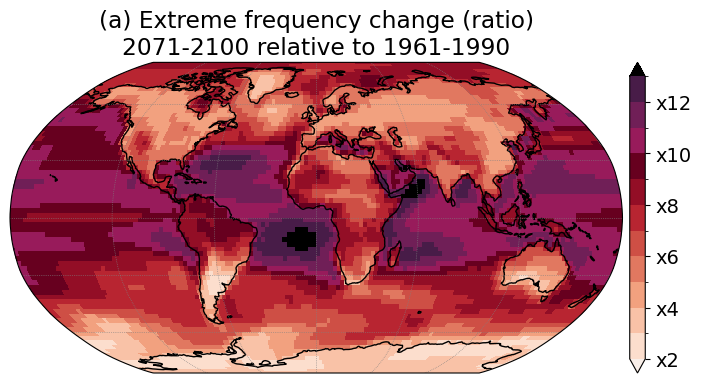

In [4]:
ratio = ds['exceedances_test'] / ds['exceedances']

fig, ax = plot_map(
    ratio.mean('model'), 
    levels=levels, 
    colors=colors,
    cbar_kwargs={
        'ticks': ticks,
        'format': mticker.FixedFormatter([f'x{t}' for t in ticks]),
        'pad': .01, 
        # 'magic' ratio via: https://stackoverflow.com/a/26720422/2699929
        'fraction': 0.046,
        'label': ''
    })

ax.set_title('(a) Extreme frequency change (ratio)\n2071-2100 relative to 1961-1990')
fig.tight_layout()
# fig.savefig(os.path.join(PLOT_PATH, 'figure6a.png'), dpi=300)
fig.savefig(os.path.join(PLOT_PATH, 'figure6a.pdf'), dpi=300)

## Figure 6b: Ratio future vs past corrected

Mean (0/5/95/100 perc): 7.4% (2.2%/3.8%/10.0%/10.0%)


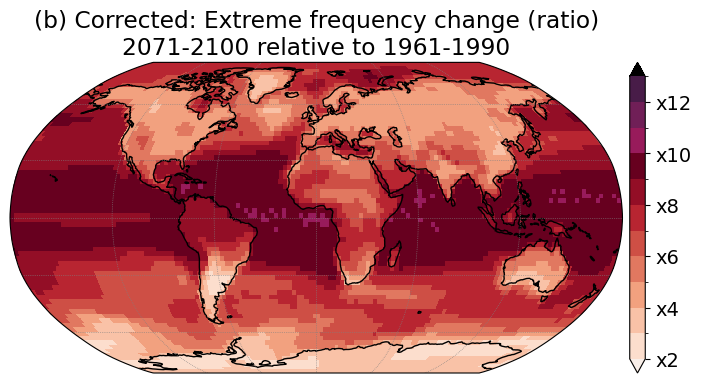

In [5]:
ratio_des = ds['exceedances_test_deseasonalized'] / ds['exceedances_deseasonalized']  
fig, ax = plot_map(
    ratio_des.mean('model'), levels=levels, colors=colors, 
    cbar_kwargs={
        'ticks': ticks,
        'format': mticker.FixedFormatter([f'x{t}' for t in ticks]),
        'pad': .01, 
        'fraction': 0.046,
        'label': ''
    })
ax.set_title('(b) Corrected: Extreme frequency change (ratio)\n2071-2100 relative to 1961-1990')
fig.tight_layout()

# fig.savefig(os.path.join(PLOT_PATH, 'figure6b.png'), dpi=300)
fig.savefig(os.path.join(PLOT_PATH, 'figure6b.pdf'), dpi=300)

## Figure 6c: Relative difference in ratios

Mean (0/5/95/100 perc): 10.2% (-5.7%/0.6%/25.1%/57.3%)


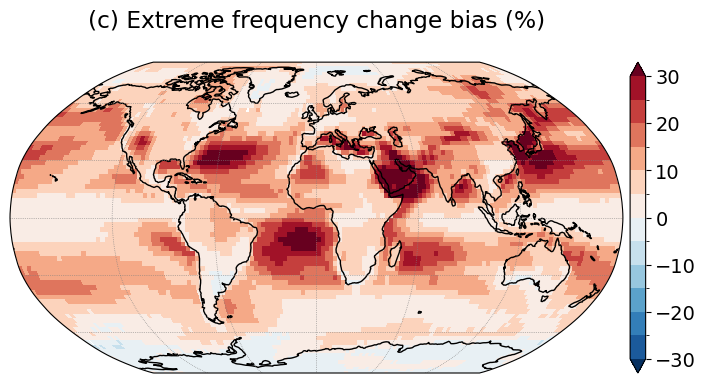

In [6]:
ratio_diff = (ratio - ratio_des) / ratio_des * 100

fig, ax = plot_map(ratio_diff.mean('model'), levels=np.arange(-30, 31, 5))

ax.set_title('(c) Extreme frequency change bias (%)', pad=25)
fig.tight_layout()
# fig.savefig(os.path.join(PLOT_PATH, 'figure6c.png'), dpi=300)
fig.savefig(os.path.join(PLOT_PATH, 'figure6c.pdf'), dpi=300)

## Figure 6d: Relative difference in ratios of 3-day heatwaves in extended summer

In [7]:
ratio_summer_long = ds['exceedances_test_extended-summer_3d'] / ds['exceedances_extended-summer_3d'] 
ratio_summer_long_des = ds['exceedances_test_deseasonalized_extended-summer_3d'] / ds['exceedances_deseasonalized_extended-summer_3d'] 
ratio_diff_summer_long = (ratio_summer_long - ratio_summer_long_des) / ratio_summer_long_des * 100

Mean (0/5/95/100 perc): 6.8% (-7.9%/-2.0%/22.1%/49.7%)


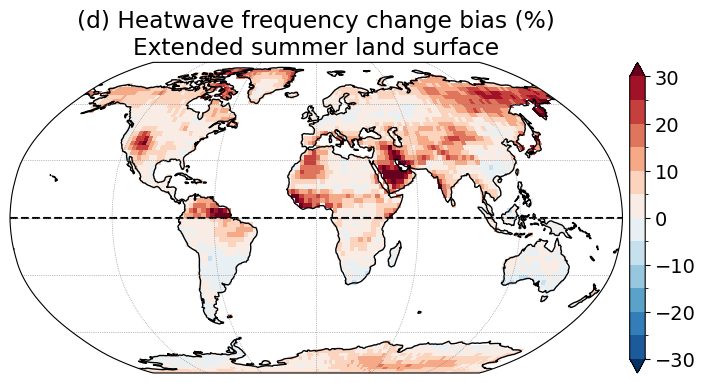

In [8]:
fig, ax = plot_map(
    mask_ocean(ratio_diff_summer_long.mean('model')), 
    levels=np.arange(-30, 31, 5), 
    equator_line=True,
)

ax.set_title('(d) Heatwave frequency change bias (%)\nExtended summer land surface')
# ax.text(-150, 0, 'MJJAS\n\nNDJFM',  va='center', transform=ccrs.PlateCarree(), fontweight='bold')
fig.tight_layout()
# fig.savefig(os.path.join(PLOT_PATH, 'figure6d.png'), dpi=300)
fig.savefig(os.path.join(PLOT_PATH, 'figure6d.pdf'), dpi=300)